# Project Development Phase

## Sprint 2 - Model Building

### Importing the required libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical
import keras

### Loading the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Analyzing the data

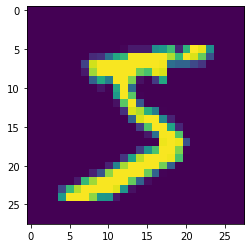

In [4]:
plt.imshow(X_train[0])

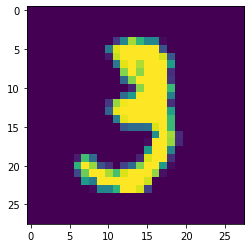

In [5]:
plt.imshow(X_train[10])

In [6]:
print(y_train[0])
print(y_train[10])

5
3


### Reshaping the data

In [7]:
# Applying threshold for removing noise 
_, X_train_th = cv2.threshold(X_train,127,255,cv2.THRESH_BINARY)
_, X_test_th = cv2.threshold(X_test,127,255,cv2.THRESH_BINARY)

In [8]:
# Reshaping 
X_train = X_train_th.reshape(-1,28,28,1)
X_test = X_test_th.reshape(-1,28,28,1)

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Applying one hot encoding

In [10]:
num_classes = 10

In [11]:
# Creating categorical output from 0 to 9
y_train = to_categorical(y_train, num_classes = num_classes)
y_test = to_categorical(y_test, num_classes = num_classes)

In [12]:
# cross checking shape of input and output
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


## Creating CNN Model

### Add CNN Layers

In [14]:
input_shape = (28,28,1)
number_of_classes = 10

In [13]:
model = Sequential()

In [15]:
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

### Compiling the model

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

### Fitting the model

In [19]:
history = model.fit(X_train, y_train,epochs=10, shuffle=True,
                    batch_size = 200,validation_data= (X_test, y_test))  

Epoch 1/10
300/300 [==============================] - 12s 13ms/step - loss: 25.0222 - accuracy: 0.1340 - val_loss: 6.4139 - val_accuracy: 0.2741
Epoch 2/10
300/300 [==============================] - 3s 12ms/step - loss: 13.1048 - accuracy: 0.2047 - val_loss: 2.8442 - val_accuracy: 0.4471
Epoch 3/10
300/300 [==============================] - 3s 12ms/step - loss: 7.6952 - accuracy: 0.2652 - val_loss: 1.6616 - val_accuracy: 0.5193
Epoch 4/10
300/300 [==============================] - 4s 12ms/step - loss: 4.8530 - accuracy: 0.2993 - val_loss: 1.4142 - val_accuracy: 0.5263
Epoch 5/10
300/300 [==============================] - 3s 12ms/step - loss: 3.3710 - accuracy: 0.3187 - val_loss: 1.4966 - val_accuracy: 0.5306
Epoch 6/10
300/300 [==============================] - 3s 12ms/step - loss: 2.6692 - accuracy: 0.3259 - val_loss: 1.5944 - val_accuracy: 0.5289
Epoch 7/10
300/300 [==============================] - 3s 12ms/step - loss: 2.3340 - accuracy: 0.3370 - val_loss: 1.6454 - val_accuracy: 0.5

### Save the model

In [20]:
model.save("digit_classifier.h5")